In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [83]:
from pytz import all_timezones, country_timezones

In [84]:
master = pd.read_csv("complete.csv", error_bad_lines=False)

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

In [85]:
scrubbed = pd.read_csv("scrubbed.csv", error_bad_lines=False)

In [86]:
scrubbed.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [87]:
df = scrubbed.copy()


In [88]:
df['timestamp'] = pd.to_datetime(df['datetime'], errors='coerce')


In [89]:
df['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [90]:
df['hour'] = df['timestamp'].dt.hour

In [91]:
df['day'] = df['timestamp'].dt.dayofweek


In [92]:

df['weekday'] = df['timestamp'].dt.day_name()

In [93]:
df['day'].describe()

count    79638.000000
mean         3.154110
std          1.986359
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: day, dtype: float64

In [94]:

df['weekday'].describe()

count        79638
unique           7
top       Saturday
freq         13964
Name: weekday, dtype: object

In [95]:
order = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['weekday'] = pd.Categorical(df['weekday'], categories=order, ordered=True)
df.sort_values(by='weekday', inplace=True)

In [96]:
df["weekday"] = df["weekday"].astype("category")
df["weekday"].cat.set_categories(order, inplace=True)

In [97]:
df["weekday"].describe()

count        79638
unique           7
top       Saturday
freq         13964
Name: weekday, dtype: object

In [98]:
df.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,timestamp,hour,day,weekday
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10 20:30:00,20.0,0.0,Monday
32135,3/17/2014 21:20,brisbane (australia),NaN,au,circle,30,30 seconds,White beam of light in sky with circular objec...,3/18/2014,-27.47101,153.024292,2014-03-17 21:20:00,21.0,0.0,Monday
32136,3/17/2014 21:45,surat (india),NaN,NaN,fireball,60,1 minute,Red-orange colored circular disc.,3/18/2014,21.195,72.819444,2014-03-17 21:45:00,21.0,0.0,Monday
32137,3/17/2014 22:22,new river,az,us,light,4,4 seconds,Red&#44 green and white bright light seen in N...,3/18/2014,33.9158333,-112.135278,2014-03-17 22:22:00,22.0,0.0,Monday
32163,3/18/2002 03:00,edison,nj,us,flash,60,< 1 minute,In mid night&#44 flashing big yellow white lig...,7/5/2005,40.5186111,-74.412500,2002-03-18 03:00:00,3.0,0.0,Monday


In [99]:
hours = list(df['hour'].unique())
hours.sort()


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80332 entries, 0 to 79942
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  object        
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
 11  timestamp             79638 non-null  datetime64[ns]
 12  hour                  79638 non-null  float64       
 13  day             

In [101]:
time_error = df[df['hour'].isnull()]
time_error.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,timestamp,hour,day,weekday
388,10/11/2006 24:00,rome,ny,us,oval,120,a min or two,I was walking from the garage to the house&#44...,2/1/2007,43.2127778,-75.456111,NaT,NaN,NaN,NaN
693,10/1/2001 24:00,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000,2 years,go to: http://www.24horas.com.pe/data/videos/...,3/4/2003,-5.129547,-80.120569,NaT,NaN,NaN,NaN
962,10/1/2012 24:00,novi,mi,us,triangle,300,5 minutes,V shaped and 8 big and very brite lights&#44mo...,10/30/2012,42.4805556,-83.475556,NaT,NaN,NaN,NaN
1067,10/12/2003 24:00,salatiga (indonesia),NaN,NaN,disk,22,22 seconds,UFO in Salatiga&#44Indonesia,10/31/2003,-7.33683,110.498817,NaT,NaN,NaN,NaN
1221,10/12/2013 24:00,cincinnati,oh,us,fireball,300,3-5 minutes,A bright orange light split into four&#44 did ...,10/14/2013,39.1619444,-84.456944,NaT,NaN,NaN,NaN


In [102]:
time_error['datetime'] = time_error['datetime'].replace('24:', '00:', regex=True)

In [103]:
time_error['timestamp'] = pd.to_datetime(time_error['datetime'], errors='coerce') + pd.Timedelta(1, unit='d')

In [104]:
def addTimeDetails(df):
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.dayofweek
    df['weekday'] = df['timestamp'].dt.day_name()

In [105]:
addTimeDetails(time_error)

In [106]:
time_error.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,timestamp,hour,day,weekday
388,10/11/2006 00:00,rome,ny,us,oval,120,a min or two,I was walking from the garage to the house&#44...,2/1/2007,43.2127778,-75.456111,2006-10-12,0,3,Thursday
693,10/1/2001 00:00,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000,2 years,go to: http://www.24horas.com.pe/data/videos/...,3/4/2003,-5.129547,-80.120569,2001-10-02,0,1,Tuesday
962,10/1/2012 00:00,novi,mi,us,triangle,300,5 minutes,V shaped and 8 big and very brite lights&#44mo...,10/30/2012,42.4805556,-83.475556,2012-10-02,0,1,Tuesday
1067,10/12/2003 00:00,salatiga (indonesia),NaN,NaN,disk,22,22 seconds,UFO in Salatiga&#44Indonesia,10/31/2003,-7.33683,110.498817,2003-10-13,0,0,Monday
1221,10/12/2013 00:00,cincinnati,oh,us,fireball,300,3-5 minutes,A bright orange light split into four&#44 did ...,10/14/2013,39.1619444,-84.456944,2013-10-13,0,6,Sunday


In [107]:
time_error.index

Int64Index([  388,   693,   962,  1067,  1221,  1222,  1317,  1359,  1445,
             1663,
            ...
            78480, 78665, 79091, 79124, 79125, 79136, 79137, 79740, 79759,
            79942],
           dtype='int64', length=694)

In [108]:
df.loc[df.index.isin(time_error.index)] = time_error

In [109]:
df[df['hour'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,timestamp,hour,day,weekday


In [110]:
df['hour'] = df['hour'].astype(int)

In [111]:
shapes = df.pivot_table(index='country',
               columns='shape',
               aggfunc='size',
               fill_value=0)

In [112]:
df.pivot_table(index='weekday',
               columns='hour',
               aggfunc='size',
               fill_value=0)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,640,393,292,269,226,237,171,129,103,128,...,164,167,186,317,542,790,1087,1358,1321,912
Tuesday,606,480,335,264,187,258,195,149,120,128,...,200,173,222,373,616,895,1143,1483,1335,983
Wednesday,656,415,276,289,211,247,177,132,116,136,...,171,180,217,366,509,834,1250,1590,1502,1056
Thursday,600,412,332,260,194,207,209,133,104,133,...,154,210,236,370,553,877,1219,1701,1405,1057
Friday,684,443,330,264,209,218,177,129,134,148,...,169,215,207,366,521,889,1243,1697,1648,1212
Saturday,765,544,404,315,231,215,154,141,120,164,...,227,238,256,440,671,999,1471,2078,2153,1572
Sunday,851,523,388,343,271,209,141,92,106,121,...,237,250,296,360,590,863,1204,1538,1473,1161


In [113]:
us_data = df[df['country'] == 'us'].copy()

In [114]:
us_heatmap = us_data.pivot_table(index='weekday',
               columns='hour',
               aggfunc='size',
               fill_value=0)

Text(0.5, 67.34336842105266, 'Hour of Sighting (24h)')

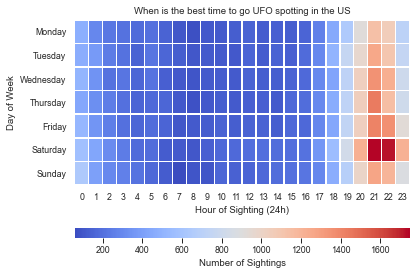

In [115]:
sns.set_style('darkgrid')
sns.set_context('paper')
#plot points
grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
sns.heatmap(us_heatmap, 
    annot=False, 
    fmt="g",
    square=True, 
    cmap='coolwarm', 
    linewidths=.5,  
    ax=ax,
    cbar_ax=cbar_ax,
    cbar_kws={"orientation": "horizontal", 'label': 'Number of Sightings'}).set_title('When is the best time to go UFO spotting in the US')
# ax2 = plt.axes()
ax.set_ylabel('Day of Week')
ax.set_xlabel('Hour of Sighting (24h)')

In [116]:
def construct_shapes_graph(df):
    sns.set_style('darkgrid')
    sns.set_context('paper')
    # Draw a nested barplot to show survival for class and sex
    shapes = df["shape"].value_counts().index
    print(shapes)
    shape_values = df["shape"].value_counts().values
    plt.subplots(figsize=(24,8))
    sns.barplot(shapes, shape_values)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=20)

    plt.show()

Index(['light', 'triangle', 'circle', 'fireball', 'unknown', 'other', 'sphere',
       'disk', 'oval', 'formation', 'cigar', 'changing', 'rectangle', 'flash',
       'cylinder', 'diamond', 'chevron', 'teardrop', 'egg', 'cone', 'cross',
       'delta', 'round', 'flare', 'hexagon', 'pyramid', 'crescent', 'changed'],
      dtype='object')


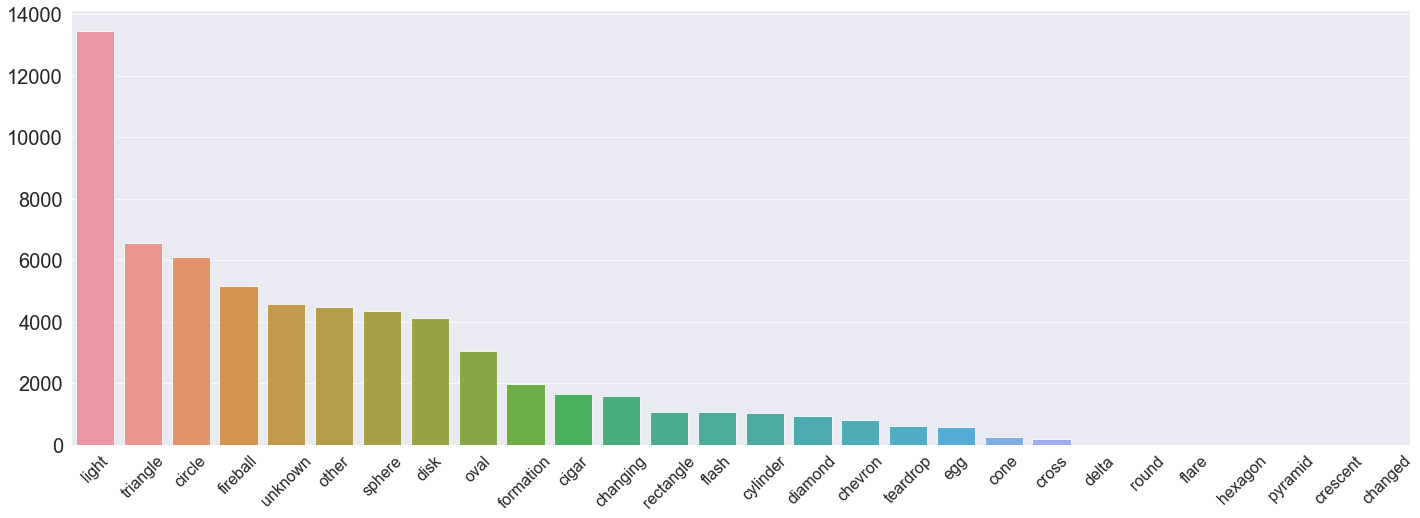

In [117]:
construct_shapes_graph(us_data)

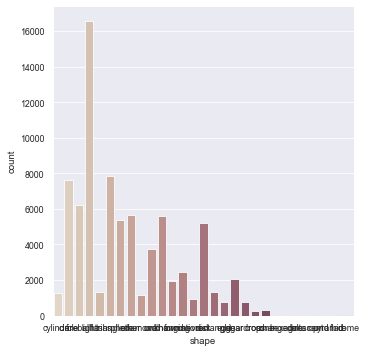

In [118]:
sns.catplot(x="shape", kind="count", palette="ch:.25", data=df)

In [124]:
def shapes_bar(df):
    sns.set_style('darkgrid')
    sns.set_context('paper')
    shapes = df["shape"].value_counts().index
    df['shape'] = pd.Categorical(df['shape'], categories=shapes, ordered=True)
    df.sort_values(by='shape', inplace=True)
    chart = sns.catplot(x="shape", kind="count", palette="ch:.25", data=df)
    chart.set_xticklabels(shapes, rotation=45, horizontalalignment='right')

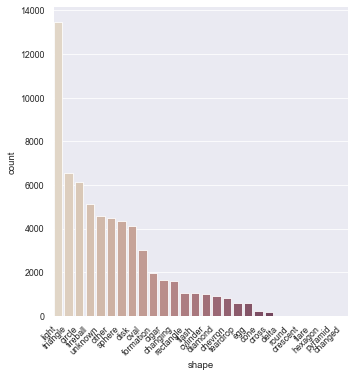

In [125]:
shapes_bar(us_data)

In [127]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43026136111758173, 0.6200066482697917, 0.6787801878373952),
 (0.6085255804707219, 0.7412795877319109, 0.7824000973141302),
 (0.786789799823862, 0.86255252719403, 0.8860200067908652),
 (0.95, 0.95, 0.95),
 (0.954577257933482, 0.7665309859226215, 0.7803256889894359),
 (0.9197182699854205, 0.5873587656270927, 0.6117400023569117),
 (0.884859282037359, 0.40818654533156384, 0.4431543157243877),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]